# Aprendizaje Automático y Big Data
## Práctica 2 : Regresión Logistica

Guillermo García Patiño Lenza y Mario Quiñones Pérez 


### PARTE 1
### Regresión logística
### 1.1. Visualización de los datos

In [5]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt

def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

### 1.1. Visualización de los datos

In [3]:
def draw_graph(file_name, labels = ['y = 1', 'y = 0']):
    datos = carga_csv(file_name)
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    # Obtiene un vector con los índices de los ejemplos positivos
    pos = np.where (Y == 1)
    posn = np.where (Y == 0)

    # Dibuja los ejemplos positivos
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k', label = labels[0])
    plt.scatter(X[posn, 0], X[posn, 1], marker='o', c='y', label = labels[1])
    plt.legend(loc='upper right')
    plt.show()

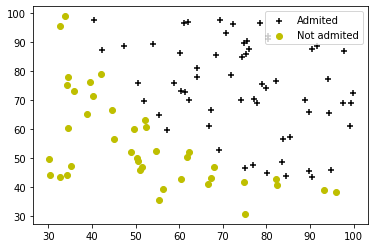

In [4]:
draw_graph("ex2data1.csv", ['Admited', 'Not admited'])

### 1.2. Función sigmoide

In [7]:
def sigmoide(Z):
    sigmoide = 1 / (1 + np.exp(-Z))
    return sigmoide

### 1.3. Cálculo de la función de coste y su gradiente

In [ ]:
def normalizar(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return(X_norm, mu, sigma)

In [192]:
def coste_logistico(T, X, Y):
    G = sigmoide(np.dot(X, T))
    #falla porq G es todo unos no se muy bien porq
    coste = (- 1 / (len(X))) * (np.dot(Y, np.log(G)) + np.dot((1 - Y), np.log(1 - G)))
    return coste

In [187]:
def gradiente_logistico(T, X, Y):
    m = len(Y)
    G = sigmoide(np.matmul(X, T))
    Dif = (np.transpose(G) - Y)
    gradiente = (1/m)*np.dot(Dif, X)
    return gradiente

In [206]:
def descenso_gradiente(X, Y):
    n = len(Y)
    X_2 = np.hstack([np.ones([n,1]), X])
    X_nor, mu, s = normalizar(X)
    X_nor2 = np.hstack([np.ones([n,1]), X_nor])
    m = np.shape(X_2)[1]
    T = np.zeros([m,1])
    T = gradiente_logistico(T, X_nor2, Y)
    c = coste_logistico(T[0], X_nor2, Y)
    return T[0] , c

In [207]:
def main2():
    datos = carga_csv("ex2data1.csv")
    X = datos[:,:-1]
    Y = datos[:,-1]
    P , c = descenso_gradiente(X,Y)
    print(P, c)
    
main2()

[-0.1        -0.28122914 -0.25098615] 0.8635709865659265


### 1.4. Cálculo del valor óptimo de los parámetros

In [151]:
def optimiza():
    datos = carga_csv("ex2data1.csv")
    X = datos[:,:-1]
    Y = datos[:,-1]
    n = len(Y)
    X = np.hstack([np.ones([n,1]), X])
    m = np.shape(X)[1]
    T = np.zeros([m,1])
    result = opt.fmin_tnc(func=coste_logistico, x0=T, fprime = gradiente_logistico,args=(X, Y))
    theta_opt = result[0]
    return theta_opt

In [152]:
optimiza()

array([-25.16131865,   0.20623159,   0.20147149])

In [127]:
def draw_graph(file_name, labels = ['y = 1', 'y = 0'], line = False, Theta = []):
    datos = carga_csv(file_name)
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    # Obtiene un vector con los índices de los ejemplos positivos
    pos = np.where (Y == 1)
    posn = np.where (Y == 0)

    # Dibuja los ejemplos positivos
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k', label = labels[0])
    plt.scatter(X[posn, 0], X[posn, 1], marker='o', c='y', label = labels[1])
    plt.legend(loc='upper right')
    
    if(line):
        pinta_frontera_recta(X, Y, Theta, plt)
    
    plt.show()

In [155]:
def frontera(X, Y, theta, plt):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
 
    h = sigmoide(np.c_[np.ones((x1.ravel().shape[0], 1)),
    x1.ravel(), 
    x2.ravel()].dot(theta))
    h = h.reshape(x1.shape)
    
    plt.contour(x1, x2, h, [0.5], linewidths=1, colors='b')

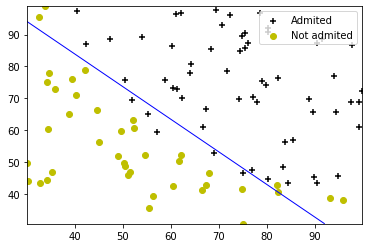

In [137]:
draw_graph("ex2data1.csv", ['Admited', 'Not admited'], line= True, Theta = optimiza())

### 1.5. Evaluación de la regresión logística

In [213]:
def evaluacion():
    datos = carga_csv("ex2data1.csv")
    X = datos[:,:-1]
    Y = datos[:,-1]
    n = len(Y)
    X = np.hstack([np.ones([n,1]), X])
    Theta = optimiza()
    unos = sigmoide(np.matmul(X,Theta)) >= 5
    compara = unos == Y
    porcentaje = sum(compara) / n
    return porcentaje

In [214]:
evaluacion()
# mal por lo mismo coste y 

0.4

### PARTE 2
### Regresión logística regularizada

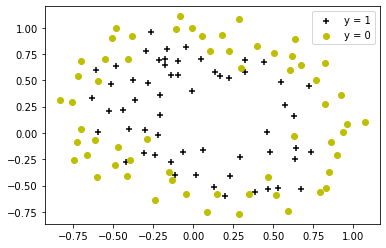

In [330]:
draw_graph("ex2data2.csv")

### 2.1. Mapeo de los atributos

In [27]:
import sklearn.preprocessing as pr

In [39]:
def plot_decisionboundary(X, Y, theta, poly):
    plt.figure()
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    h = sigmoide(poly.fit_transform(np.c_[xx1.ravel(),
    xx2.ravel()]).dot(theta))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    plt.savefig("boundary.pdf")
    plt.close()

In [40]:
datos = carga_csv("ex2data1.csv")
X = datos[:,:-1]
Y = datos[:,-1]
n = len(Y)
X = np.hstack([np.ones([n,1]), X])
m = np.shape(X)[1]
T = np.ones([6,1])
plot_decisionboundary(X, Y, T, pr.PolynomialFeatures(2))

<ipython-input-39-92fc1f63eae7>:10: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')


### 2.2. Cálculo de la función de coste y su gradiente

In [192]:
def coste_regularizado(T, X, Y, landa):
    G = sigmoide(np.dot(X, T))
    #falla porq G es todo unos no se muy bien porq
    coste = (- 1 / (len(X))) * (np.dot(Y, np.log(G)) 
                                + np.dot((1 - Y), np.log(1 - G))) 
                                + (landa / 2*(len(X)))
    
    return coste

In [187]:
def gradiente_regularizado(T, X, Y, landa):
    m = len(Y)
    G = sigmoide(np.matmul(X, T))
    Dif = (np.transpose(G) - Y)
    gradiente = (1/m)*np.dot(Dif, X) + (landa/m)*T[j]
    return gradiente

### 2.3. Cálculo del valor óptimo de los parámetros

In [151]:
def optimiza():
    datos = carga_csv("ex2data1.csv")
    X = datos[:,:-1]
    Y = datos[:,-1]
    n = len(Y)
    X = np.hstack([np.ones([n,1]), X])
    m = np.shape(X)[1]
    T = np.zeros([m,1])
    
    ##############################################
    ######## Falta el mapeo de atributos #########
    ##############################################
    
    
    result = opt.fmin_tnc(func=coste_regularizado, x0=T, fprime = gradiente_regularizado,args=(X, Y))
    theta_opt = result[0]
    return theta_opt

### 2..4. Efectos de la regularización